In [1]:
from Bio import Entrez, SeqIO

VC1 ='NC_002505' # Vibrio cholerae chr 1
VC2 ='NC_002506' # Vibrio cholerae chr 2
TP = 'NC_009486' #Thermophilus petrophilia
EC = 'NC_000913' # Escerichia coli K12

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
Entrez.email='d.m.a.martin@dundee.ac.uk'
seqentry = next(SeqIO.parse(Entrez.efetch(db='nucleotide', id=TP, retmode='txt', rettype='gbwithparts'), 'gb'))
ECseqentry = next(SeqIO.parse(Entrez.efetch(db='nucleotide', id=EC, retmode='txt', rettype='gbwithparts'), 'gb'))

In [9]:
#seq = str(seqentry.seq)
seq = str(ECseqentry.seq)

In [10]:
A_count = seq.count('A')
C_count = seq.count('C')
G_count = seq.count('G')
T_count = seq.count('T')
print('A: {} C: {} G: {} T: {}'.format(A_count, C_count, G_count, T_count))



A: 1142742 C: 1180091 G: 1177437 T: 1141382


In [11]:
half = int(len(seq)/2) 
A_forward = seq[:half].count('A')
C_forward = seq[:half].count('C')
G_forward = seq[:half].count('G')
T_forward = seq[:half].count('T')
A_rev = seq[half:].count('A')
C_rev = seq[half:].count('C')
G_rev = seq[half:].count('G')
T_rev = seq[half:].count('T')
print('forward A: {} C: {} G: {} T: {}'.format(A_forward, C_forward, G_forward, T_forward))
print('reverse A: {} C: {} G: {} T: {}'.format(A_rev, C_rev, G_rev, T_rev))


forward A: 572797 C: 579868 G: 592773 T: 575388
reverse A: 569945 C: 600223 G: 584664 T: 565994


In [12]:
gcskew = []
base=[]
windowsize = len(seq)//2
dseq=seq+seq
basecount ={'A':0, 'C': 0, 'G': 0, 'T': 0}
for p in range(len(dseq)):
    if dseq[p] in basecount:
        basecount[dseq[p]] = basecount[dseq[p]] +1
        if p > windowsize:
            basecount[dseq[p-windowsize]] = basecount[dseq[p-windowsize]] -1
        
    if  not p%1000 and p:
        gcs = (basecount['G'] - basecount['C'])/(basecount['C']+basecount['G'])
        gcskew.append(gcs)
        base.append(p-windowsize)
    
    

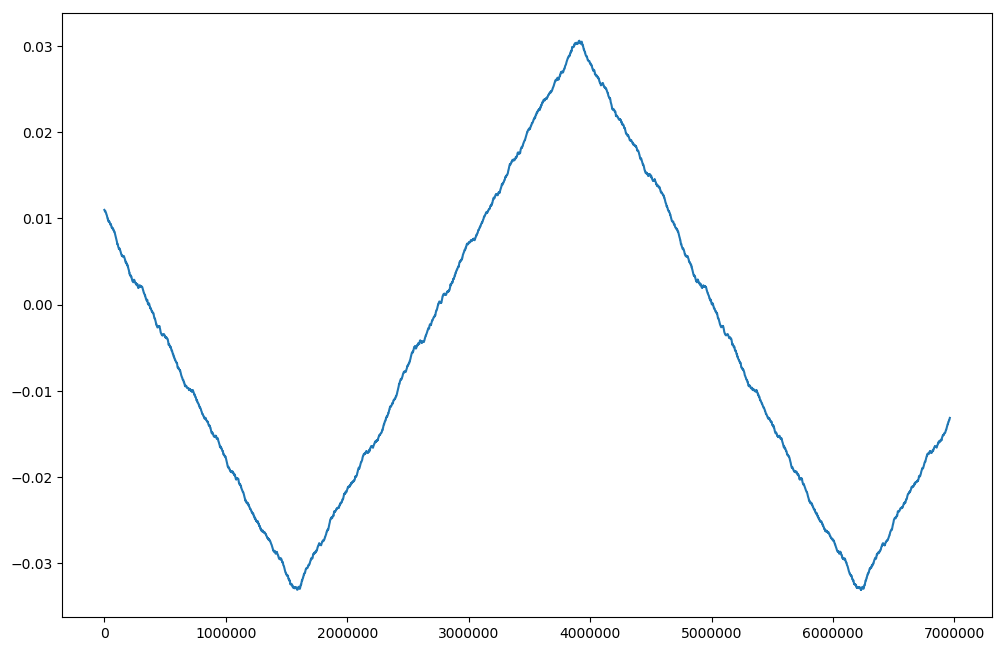

In [13]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(base[windowsize//1000:],gcskew[windowsize//1000:])